<a href="https://colab.research.google.com/github/Zezo-Elkafoury/AI-Forecasting-Automation/blob/main/Ai_time_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain-llm7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.6/443.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.2
    Uninstalling pydantic_core-2.33.2:
      Successfully uninstalled pydantic_core-2.33.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.7
    Uninstalling pydantic-2.11.7:
      Successfully uninstalled pydantic-2.11.7
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the follo

In [ ]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.2 MB/s eta 0:00:00


In [ ]:
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4 pkg-config
0 upgraded, 10 newly installed, 2 to remove and 35 not upgraded.
Need to get 2,482 kB of archives.
After this operation, 7,671 kB o

In [ ]:
!sudo pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp311-cp311-linux_x86_64.whl size=169714 sha256=94ec46b332185b932ea3aa72cdb9d4894ede6635de3381b226424bc3c2a8ddc3
  Stored in directory: /root/.cache/pip/wheels/9c/5f/df/6fffd2a4353f26dbb0e3672a1baf070c124a1d74a5f9318279
Successfully built pygraphviz


# Loading the LLM

In [ ]:
from langchain_llm7 import ChatLLM7
from langchain_core.messages import HumanMessage, AIMessage
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser,BaseOutputParser
from langgraph.graph import StateGraph,END
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [ ]:
llm = ChatLLM7(
    model='gpt-4.1-2025-04-14'
)
response = llm.invoke([HumanMessage(content="hello")])
Markdown(response.content)

Hey there! What's up?

## Loading Data

In [ ]:
df=pd.read_csv('/content/oil.csv')
df2=pd.read_csv('/content/Walmart_Sales.csv')

In [ ]:
df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
df['dcoilwtico'].describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [ ]:
df2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Agent Structure

- forecast_preprocessor => Bouncer (Router)

- Forecast Code Generator => Generates Python code

- Data Analyst Agent => Answers data related questions

- Visulaization Function

- Executing Code => Runs the Python code

## 1- Forecast Preprocessor



In [ ]:
forecast_preprocessor_prompt = PromptTemplate(
    template="""
You are an expert question classifier for time series analysis. Your task is to:

1. Analyze the user's question
2. Determine if it requires:
   - Data analysis/exploration (statistics, diagnostics, preparation)
   - Time series forecasting (future predictions)
3. Return JSON with your classification

# CLASSIFICATION CRITERIA:
- DATA ANALYSIS QUESTIONS:
  - Requests for statistics, summaries, or data properties
  - Questions about data quality (missing values, outliers)
  - Time series diagnostics (stationarity, autocorrelation)
  - Data transformations (rolling stats, differencing)

- FORECASTING QUESTIONS:
  - Requests for future predictions
  - Questions about future trends
  - Any question containing time horizons (next 30 days, etc.)

# EXAMPLES:
1. "Show me monthly averages" → DATA_ANALYSIS
2. "Forecast prices for next year" → FORECAST
3. "Is this series stationary?" → DATA_ANALYSIS
4. "Predict sales for Q4" → FORECAST

# OUTPUT FORMAT:
{{
    "question_type": "DATA_ANALYSIS" or "FORECAST",
    "reasoning": "brief explanation of your classification"
}}

USER QUESTION: {question}
""",
    input_variables=["question"]
)


In [ ]:
forecast_preprocessor=forecast_preprocessor_prompt | llm | JsonOutputParser()

## 2- Forecast Code Generator

In [ ]:
forecast_code_prompt = PromptTemplate(
    template="""
You are a forecasting expert. Given an input question and data provided as a dictionary from a SQL agent, your job is to write Python code to perform a forecast using the data as an input and determining a forecast horizon and which items to forecast.

Return Python code in this format:

```python
def forecast_ts(data):
    ...
    return forecast_df


# **IMPORTANT NOTES**:

 - Return a single function named forecast_ts that ingests a parameter containing "data", and outputs one data frame (forecast_df).

 - Do NOT re-write data inside the generated Python code.

 - Make sure to convert columns containing date information to Pandas datetime.

 - If no ID column is provided, make an ID column for use with the forecasts. Just use "i" for the ID.

# **KEY DECISIONS FROM THE PROVIDED QUESTION**:
 - Which item should be forecasted? If none is provided, assume that all items should be forecasted (use a loop to do this).

 - How far into the future should the forecast be made?

 - If no forecast horizon is provided, determine a reasonable forecast horizon based on the data provided and its periodicity (example: if monthly data, forecast 12 months—a year's worth).

 - If more than one ID column is included in the data, consolidate into a single "id_column"

**USEFUL FORECASTING FUNCTIONS**
- use these functions to help you forecast. Make modified versions based on the input data

# **ACCURACY-FOCUSED ENHANCEMENTS**:

1. **Model Selection**:
   - Always evaluate multiple models using time-series cross-validation
   - Select model based on both MAE and MASE metrics
   - Include confidence intervals in all forecasts

2. **Data Preparation**:
   - Automatic frequency detection with fallback logic
   - Advanced stationarity testing (ADF/KPSS with auto-differencing)
   - Multiple seasonality detection for weekly/monthly/quarterly patterns

3. **Feature Engineering**:
   - Automatic lag feature generation based on detected seasonality
   - Fourier terms for all detected seasonal periods
   - Rolling statistics with adaptive window sizes

4. **Error Handling**:
   - Graceful fallback for failed models
   - Automatic data quality checks
   - Validation of forecast outputs

# **CORE REQUIREMENTS** (unchanged):
 - Single function named forecast_ts that ingests "data" and returns forecast_df
 - Preserve original data (no in-place modification)
 - Automatic datetime conversion
 - Default ID column 'i' if none provided

def forecast_ts(data):
    # ================================
    # Wrap imports inside function
    # ================================
    import numpy as np
    import pandas as pd
    from xgboost import XGBRegressor
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    from sklearn.model_selection import TimeSeriesSplit
    from prophet import Prophet
    from statsmodels.tsa.seasonal import seasonal_decompose
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    from tbats import TBATS
    from sklearn.preprocessing import MinMaxScaler
    import warnings
    warnings.filterwarnings('ignore')

    # ================================
    # Enhanced Data Validation
    # ================================
    def validate_input_data(df):
        "Check data quality before processing"
        if len(df) < 12:
            raise ValueError("Insufficient data (minimum 12 points required)")
        if df.isna().all().any():
            raise ValueError("Column with all NaN values detected")
        return True

    # ================================
    # Advanced Frequency Detection
    # ================================
    def detect_frequency(df, date_col):
        "Robust frequency detection with fallback"
        try:
            freq = pd.infer_freq(df[date_col])
            if freq: return freq

            diffs = df[date_col].diff().dropna().mode()
            if len(diffs) > 0:
                delta = diffs[0]
                if pd.Timedelta(days=1) - pd.Timedelta(hours=6) <= delta <= pd.Timedelta(days=1) + pd.Timedelta(hours=6):
                    return 'D'
                elif pd.Timedelta(days=7) - pd.Timedelta(days=1) <= delta <= pd.Timedelta(days=7) + pd.Timedelta(days=1):
                    return 'W'
                elif pd.Timedelta(days=30) - pd.Timedelta(days=4) <= delta <= pd.Timedelta(days=30) + pd.Timedelta(days=4):
                    return 'M'
        except:
            pass
        return 'D'  # Default fallback

    # ================================
    # Enhanced Model Evaluation
    # ================================
    def evaluate_model(model_func, train, test, value_col, y_train):
        "Evaluate using both MAE and MASE"
        forecast = model_func(train, value_col)
        mae = mean_absolute_error(test[value_col], forecast)

        # Calculate MASE
        naive_errors = np.abs(np.diff(y_train))
        mase = mae / np.mean(naive_errors)

        return {{'mae': mae, 'mase': mase}}

    # ================================
    # Multi-Seasonal Decomposition
    # ================================
    def detect_seasonality(df, value_col, freq):
        "Detect multiple seasonal patterns"
        periods = []
        if freq == 'D':
            # Check for weekly seasonality
            if len(df) > 14:  # Need at least 2 weeks
                periods.append(7)
        elif freq == 'M':
            periods.append(12)  # Yearly
            if len(df) > 24:  # Need at least 2 years
                periods.append(3)  # Quarterly
        return periods

    # ================================
    # Enhanced Forecasting Models
    # ================================
    def forecast_with_prophet_enhanced(df, value_col, date_col, periods, seasonality):
        "Prophet with automatic seasonality detection"
        m = Prophet(
            yearly_seasonality='auto',
            weekly_seasonality='auto',
            daily_seasonality='auto',
            interval_width=0.95
        )

        # Add detected seasonal periods
        for period in seasonality:
            if period == 7:
                m.add_seasonality(name='weekly', period=7, fourier_order=3)
            elif period == 12:
                m.add_seasonality(name='yearly', period=365.25, fourier_order=5)
            elif period == 3:
                m.add_seasonality(name='quarterly', period=91.25, fourier_order=3)

        m.fit(df.rename(columns={{date_col: 'ds', value_col: 'y'}}))
        future = m.make_future_dataframe(periods=periods, freq=detect_frequency(df, date_col))
        forecast = m.predict(future)
        return forecast[['date', 'yhat', 'yhat_lower', 'yhat_upper']].rename(
        columns={{'yhat': 'forecast'}}

    # ================================
    # Main Forecasting Logic
    # ================================
    def generate_forecast(df, date_col, value_col, id_col, forecast_horizon):
        "Enhanced forecasting pipeline"
        try:
            validate_input_data(df)
            freq = detect_frequency(df, date_col)
            seasonality = detect_seasonality(df, value_col, freq)

            # Model selection
            models = {{
                'Prophet': lambda: forecast_with_prophet_enhanced(df, value_col, date_col, forecast_horizon, seasonality),
                'SARIMAX': lambda: forecast_with_sarimax(df, value_col, seasonal_order=(1,1,1,seasonality[0] if seasonality else 12))
            }}

            # Evaluate models
            best_model = None
            best_score = float('inf')
            tscv = TimeSeriesSplit(n_splits=3)

            for name, model_fn in models.items():
                try:
                    scores = []
                    for train_idx, test_idx in tscv.split(df):
                        train, test = df.iloc[train_idx], df.iloc[test_idx]
                        result = evaluate_model(model_fn, train, test, value_col, train[value_col])
                        scores.append(result['mase'])

                    avg_score = np.mean(scores)
                    if avg_score < best_score:
                        best_score = avg_score
                        best_model = name
                except Exception as e:
                    print(f"Model {{name}} failed: {{str(e)}}")

            # Generate final forecast
            forecast = models[best_model]()
            return forecast

        except Exception as e:
            print(f"Forecasting failed: {{str(e)}}")
            return pd.DataFrame()

    # ================================
    # Final Implementation
    # ================================
    df = pd.DataFrame(data)
    date_col, value_col, id_col = detect_columns(df)
    forecast_horizon = determine_forecast_horizon(df, date_col)
    forecast_df = generate_forecast(df, date_col, value_col, id_col, forecast_horizon)

    return forecast_df


# ERRORS TO AVOID:

 **Try to prevent these errors**:

 - ValueError: If using all scalar values, you must pass an index

 - KeyErrors – This is typically because the columns are not selected properly from the incoming data. Ensure there is a single id_col, date_col, and value_col in the data.

 - NameError: name 'extend_single_timeseries_frame' is not defined – This happens when one of the functions was not included

 - AttributeError: 'dict' object has no attribute 'unique' – This happens when the a dictionary wasn't converted to a pandas DataFrame

 # RETURN
  - Return Python code wrapped in ```python```

 # INPUTS
  - Data sample: {data}
  - User's Forecast Question: {question}
""",
    input_variables=["question", "data"]
)


### Making a Custom output structure for python code

In [ ]:
import re

class PythonOutputParser(BaseOutputParser[str]):
    """Parse the output of an LLM call to a Python code block."""

    def parse(self, text: str) -> str:
        """Parse the output of an LLM call."""
        # Find the first occurrence of a Python code block
        match = re.search(r"```python\n(.*?)\n```", text, re.DOTALL)

        if match:
            # Extract the content within the code block
            python_code = match.group(1).strip()
            return python_code
        else:
            # If no code block is found, return the original text or an empty string
            return text.strip() # Or return "" depending on desired behavior

In [ ]:
forecast_generator=forecast_code_prompt | llm | PythonOutputParser()

In [ ]:
result2=forecast_generator.invoke({"question": "I have price data and I want to see the total price aggregated by month.", "data":df.head(1000).to_dict()})

In [ ]:
Markdown(f"```python \n{result2}\n```")

```python 
def forecast_ts(data):
    import numpy as np
    import pandas as pd
    import warnings
    warnings.filterwarnings('ignore')
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from prophet import Prophet
    from sklearn.metrics import mean_absolute_error
    from sklearn.model_selection import TimeSeriesSplit

    # 1. DATA INGESTION AND DATETIME CONVERSION
    df = pd.DataFrame(data)
    # Identify date and value columns
    date_col_candidates = [col for col in df.columns if 'date' in col.lower()]
    date_col = date_col_candidates[0] if len(date_col_candidates) > 0 else df.columns[0]
    value_col_candidates = [col for col in df.columns if col != date_col]
    value_col = value_col_candidates[0] if len(value_col_candidates) > 0 else 'value'
    if value_col == 'value':
        df.rename(columns={df.columns[1]: value_col}, inplace=True)
    df[date_col] = pd.to_datetime(df[date_col])
    df = df[[date_col, value_col]]

    # Add "i" as ID if needed
    df['i'] = 0

    # Remove rows where nothing is present for the value column
    df = df[df[value_col].notna()]

    # 2. AGGREGATE TO MONTHLY TOTALS
    df['month'] = df[date_col].dt.to_period('M').dt.to_timestamp()
    agg_df = df.groupby(['i','month'])[value_col].sum().reset_index()
    agg_df.rename(columns={'month': 'date'}, inplace=True)

    # 3. RESAMPLE TO REGULAR MONTHLY INDEX (Prophet and SARIMAX prefer regular spacing)
    min_month = agg_df['date'].min()
    max_month = agg_df['date'].max()
    monthly_idx = pd.date_range(min_month, max_month, freq='MS')
    merged_df = pd.DataFrame({'date': monthly_idx})
    merged_df = merged_df.merge(agg_df[['date', value_col]], on='date', how='left')
    merged_df['i'] = 0

    # 4. DETERMINE FORECAST HORIZON (12 months ahead for monthly data)
    forecast_horizon = 12

    # 5. ADVANCED STATIONARITY TESTING AND IMPUTATION
    series = merged_df[value_col]
    # Simple imputation (linear interpolation). Better can be used if needed.
    series = series.interpolate(method='linear', limit_direction='both')
    merged_df[value_col] = series

    # Function to calculate MASE
    def mase(y_true, y_pred, y_train):
        naive = np.mean(np.abs(np.diff(y_train)))
        if naive == 0:  # fallback
            naive = 1
        return mean_absolute_error(y_true, y_pred) / naive

    # Prepare for model split
    y = merged_df[value_col]
    dates = merged_df['date']
    tscv = TimeSeriesSplit(n_splits=3)
    results = {}
    y_train_full = y.values

    # 6. SARIMAX model
    def fit_predict_sarimax(train, test_len):
        # Enforce stationarity (log1p if needed)
        train_y = train.copy()
        order = (1,1,1)
        seasonal_order = (1,1,0,12)  # monthly seasonality
        try:
            model = SARIMAX(train_y, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            pred = model_fit.forecast(steps=test_len)
            pred_ci = model_fit.get_forecast(steps=test_len).conf_int(alpha=0.05)
            lower = pred_ci.iloc[:, 0]
            upper = pred_ci.iloc[:, 1]
            return pred.values, lower.values, upper.values
        except Exception:
            # fallback: flat forecast
            mean_val = np.mean(train_y)
            pred = np.full(test_len, mean_val)
            return pred, np.full(test_len, mean_val), np.full(test_len, mean_val)

    # 7. Prophet model
    def fit_predict_prophet(train_df, periods):
        model_df = pd.DataFrame({'ds': train_df['date'], 'y': train_df[value_col]})
        m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, interval_width=0.95)
        m.fit(model_df)
        future = m.make_future_dataframe(periods=periods, freq='MS')
        forecast = m.predict(future)
        yhat = forecast['yhat'][-periods:].values
        lower = forecast['yhat_lower'][-periods:].values
        upper = forecast['yhat_upper'][-periods:].values
        return yhat, lower, upper

    # 8. Time series cross-validation for model selection
    maes = {'SARIMAX': [], 'Prophet': []}
    mases = {'SARIMAX': [], 'Prophet': []}
    # Since we have a single time series, we can do simple splits on the regularized monthly data
    n_splits = 3
    split_size = int(merged_df.shape[0] / (n_splits + 1))
    for i in range(n_splits):
        train_end = split_size * (i + 1)
        train = merged_df[value_col].iloc[:train_end]
        test = merged_df[value_col].iloc[train_end:train_end + split_size]
        train_dates = merged_df['date'].iloc[:train_end]
        test_dates = merged_df['date'].iloc[train_end:train_end + split_size]

        # SARIMAX
        try:
            pred_sarimax, _, _ = fit_predict_sarimax(train, len(test))
            maes['SARIMAX'].append(mean_absolute_error(test, pred_sarimax))
            mases['SARIMAX'].append(mase(test, pred_sarimax, train))
        except:
            continue

        # Prophet
        try:
            train_df_prophet = pd.DataFrame({'date': train_dates, value_col: train})
            pred_prophet, _, _ = fit_predict_prophet(train_df_prophet, len(test))
            maes['Prophet'].append(mean_absolute_error(test, pred_prophet))
            mases['Prophet'].append(mase(test, pred_prophet, train))
        except:
            continue

    avg_mase = {m: np.mean(v) for m, v in mases.items() if len(v) > 0}
    # Select the best model (lowest MASE)
    if not avg_mase:
        # fallback
        best_model = 'SARIMAX'
    else:
        best_model = min(avg_mase, key=avg_mase.get)

    # 9. FINAL FORECAST
    # Training data is all of merged_df
    if best_model == 'Prophet':
        model_df = pd.DataFrame({'date': merged_df['date'], value_col: merged_df[value_col]})
        yhat, lower, upper = fit_predict_prophet(model_df, forecast_horizon)
    else:
        train = merged_df[value_col]
        yhat, lower, upper = fit_predict_sarimax(train, forecast_horizon)

    # 10. BUILD FORECAST DATAFRAME
    future_dates = pd.date_range(merged_df['date'].max() + pd.offsets.MonthBegin(1), periods=forecast_horizon, freq='MS')
    forecast_df = pd.DataFrame({
        'i': 0,
        'date': future_dates,
        'forecast': yhat,
        'forecast_lower': lower,
        'forecast_upper': upper
    })

    # Attach columns in correct order
    forecast_df = forecast_df[['i', 'date', 'forecast', 'forecast_lower', 'forecast_upper']]

    return forecast_df
```

# 3- Data Analyst agent

In [ ]:
data_questions_prompt = PromptTemplate(
    template="""
You are a Data Analysis Expert specialized in time series forecasting. Your task is to:
1. Analyze the user's question about forecasting data
2. Generate Python code to answer the question using the provided data
3. Return clean, executable Python code that produces the requested analysis

# GUIDELINES:
- Always work with the provided data (don't create synthetic data)
- Include all necessary imports within the function
- Handle missing/incorrect data gracefully
- Return a pandas DataFrame with the results
- Make the code reusable and well-commented

# COMMON QUESTION TYPES TO HANDLE:
1. Data Exploration:
   - Summary statistics
   - Missing value analysis
   - Time period coverage
   - Outlier detection

2. Forecasting Preparation:
   - Resampling time series
   - Handling missing dates
   - Feature engineering
   - Stationarity tests

3. Forecast Analysis:
   - Model comparisons
   - Error metrics
   - Confidence intervals
   - Residual analysis

4. Data Transformations:
   - Normalization/scaling
   - Differencing
   - Log transformations
   - Rolling statistics

# OUTPUT FORMAT:
```python
def analyze_forecast_data(data):
    \"\"\"
    Analyzes forecasting data based on user question.

    Args:
        data: Input data as dictionary (will be converted to DataFrame)

    Returns:
        pandas.DataFrame with analysis results
    \"\"\"
    import pandas as pd
    import numpy as np
    from statsmodels.tsa.stattools import adfuller
    # Other necessary imports...

    # Convert input to DataFrame
    df = pd.DataFrame(data)

    # [Your analysis code here]

    return results_df

# EXAMPLE QUESTIONS:
"What's the monthly average of the time series?"

"Are there any missing dates in the time series?"

"Show me the rolling 7-day average"

"Is the time series stationary?"

"What's the autocorrelation structure?"

CURRENT QUESTION:
{question}

DATA SAMPLE (first 5 rows):
{data_head}

COLUMNS IN DATA:
{columns}

# IMPORTANT:
Wrap your code in python delimiters

The function must be named analyze_forecast_data

Return a DataFrame even for single-value results
""",
input_variables=["question", "data_head", "columns"]
)

In [ ]:
data_questions_agent = data_questions_prompt | llm | PythonOutputParser()

# Visulization Function

## Using LLM to detect columns to plot

In [ ]:
column_detection_prompt = PromptTemplate(
    template="""Analyze the following DataFrame columns and identify:
    1. The datetime column (most likely to contain dates/times)
    2. The value column (numeric column to be visualized)

    Return JSON with:
    - "date_column": name of the datetime column
    - "value_column": name of the numeric value column

    Available columns: {columns}
    First row sample: {first_row}

    Focus on these common patterns:
    - Date columns often have names like: date, time, timestamp, datetime
    - Value columns are typically numeric and have names like: value, sales, price, quantity

    If uncertain, choose the most likely candidates.""",
    input_variables=["columns", "first_row"]
)

In [ ]:
column_detection_chain = column_detection_prompt | llm | JsonOutputParser()

In [ ]:
from typing import Dict
from plotly import graph_objects as go

def detect_columns(df: pd.DataFrame) -> Dict[str, str]:
    """Use LLM to detect date and value columns"""
    columns = list(df.columns)
    first_row = df.iloc[0].to_dict()

    try:
        result = column_detection_chain.invoke({
            "columns": columns,
            "first_row": first_row
        })
        return {
            "date_column": result["date_column"],
            "value_column": result["value_column"]
        }
    except:
        # Fallback to automatic detection
        date_col = None
        value_col = None

        # Find first datetime column
        for col in df.columns:
            if pd.api.types.is_datetime64_any_dtype(df[col]):
                date_col = col
                break
            try:
                pd.to_datetime(df[col])
                date_col = col
                break
            except:
                continue

        # Find first numeric column
        numeric_cols = df.select_dtypes(include='number').columns
        value_col = numeric_cols[0] if len(numeric_cols) > 0 else None

        return {
            "date_column": date_col,
            "value_column": value_col
        }

def create_visualization(state: Dict) -> Dict:
    """
    Creates an interactive Plotly line plot for the forecast.
    Automatically detects date and value columns using LLM.
    """
    print("Generating Interactive Forecast Visualization")

    # Convert data from state
    forecast_df = pd.DataFrame(state['data_forecast'])

    # Detect columns in forecast data
    forecast_cols = detect_columns(forecast_df)
    date_col = forecast_cols["date_column"]
    value_col = forecast_cols["value_column"]

    if not date_col or not value_col:
        raise ValueError("Could not detect required columns (date and value)")

    # Process date columns
    forecast_df[date_col] = pd.to_datetime(forecast_df[date_col])

    # Create Plotly figure
    fig = go.Figure()

    # Add forecast trace
    fig.add_trace(
        go.Scatter(
            x=forecast_df[date_col],
            y=forecast_df[value_col],
            mode='lines',
            name='Forecast',
            line=dict(color='#ff7f0e', width=2),
            hovertemplate='%{x|%Y-%m-%d}<br>%{y:.2f}<extra></extra>'
        )
    )

    # Add layout configuration
    fig.update_layout(
        title='Time Series Forecast',
        xaxis_title=date_col,
        yaxis_title=value_col,
        hovermode='x unified',
        plot_bgcolor='white',
        margin=dict(l=20, r=20, t=60, b=20),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        xaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1,
            tickformat='%Y-%m-%d'
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1
        )
    )

    # Store both the figure object and its data
    return {
        **state,
        "visualization": {
            "figure_data": {
                "dates": forecast_df[date_col].dt.strftime('%Y-%m-%d').tolist(),
                "values": forecast_df[value_col].tolist(),
                "date_col": date_col,
                "value_col": value_col
            },
            "plotly_figure": fig
        },
        "plotly_figure": fig,
        "date_column": date_col,
        "value_column": value_col
    }

def display_visualization(state: Dict) -> Dict:
    """Displays the Plotly figure and returns unmodified state"""
    fig = state.get('plotly_figure')
    if fig:
        display(fig)
    return state

# Using Langraph to connect the workflow

In [ ]:
from typing_extensions import TypedDict
from typing import Dict, Optional
import plotly.graph_objects as go
import pandas as pd

class GraphState(TypedDict):
    user_question: str
    data_sample_sql: dict
    data_sql: dict
    forecast_code: str
    data_sample_forecast: dict
    data_forecast: dict
    visualization: Optional[Dict[str, Dict[str, list] | go.Figure]]
    plotly_figure: Optional[go.Figure]
    date_column: Optional[str]
    value_column: Optional[str]
    is_data_question: bool
    routing_reason: Optional[str]
    data_analysis_code: Optional[str]
    data_analysis_results: Optional[dict]

In [ ]:
def preprocess_question(state: GraphState) -> GraphState:
    question = state['user_question']

    # Get classification from LLM
    try:
        classification = forecast_preprocessor.invoke({"question": question})
        is_data_question = classification["question_type"] == "DATA_ANALYSIS"

        # If forecast question, get formatted version
        if not is_data_question:
            response = forecast_preprocessor.invoke({"question": question})
            return {
                **state,
                "is_data_question": False,
                "routing_reason": classification["reasoning"]
            }
        else:
            return {
                **state,
                "is_data_question": True,
                "routing_reason": classification["reasoning"]
            }

    except Exception as e:
        # Fallback to original behavior if routing fails
        print(f"Routing failed: {str(e)}")
        response = forecast_preprocessor.invoke({"question": question})
        return {
            **state,
            "is_data_question": False,
            "routing_reason": "Fallback: Defaulted to forecast"
        }


In [ ]:
def handle_data_question(state: GraphState) -> GraphState:
    if not state.get('is_data_question'):
        return state

    print("Handling data question...")
    question = state['user_question']
    data_sample = state['data_sample_sql']
    columns = list(pd.DataFrame(data_sample).columns)

    try:
        code = data_questions_agent.invoke({
            "question": question,
            "data_head": data_sample,
            "columns": columns
        })

        local_vars = {}
        global_vars = {}
        exec(code, global_vars, local_vars)
        analysis_fn = local_vars['analyze_forecast_data']
        results_df = analysis_fn(state['data_sql'])

        return {
            **state,
            "data_analysis_code": code,
            "data_analysis_results": results_df.to_dict()
        }

    except Exception as e:
        return {**state, "error": str(e)}


In [ ]:
def generate_forecast_code(state):
  print('Forecaster Generating')
  question=state['user_question']
  data=state.get('data_sample_sql')
  response=forecast_generator.invoke({"question": question, "data": data})
  return{
      "forecast_code": response
  }

# Executing Forecast Python Code

In [ ]:
def execute_forecast_code(state):
    print('Forecaster Executing')
    # Retrieve the generated Python code and the data from the state
    code = state.get('forecast_code')
    # Get the full data as a dictionary
    data_dict = state.get('data_sql')
    # Get the user's original question
    user_question = state.get('user_question')

    # Prepare dictionaries for executing the code in an isolated environment
    local_vars = {}
    global_vars = {}

    # Execute the generated code. This will define the 'analyze_data' function.
    exec(code, global_vars, local_vars)

    # Call the newly defined 'analyze_data' function with the data and question
    # The function is accessed from the local_vars dictionary
    analysis_result_df = local_vars['forecast_ts'](data_dict)

    # Return the results, including a sample and the full data, converted back to dictionaries
    return {
        "data_sample_forecast": analysis_result_df.head(1000).to_dict(),
        "data_forecast": analysis_result_df.to_dict()
    }

## Defining the workflow structure

In [ ]:
workflow = StateGraph(GraphState)

workflow.add_node("preprocess_forecast", preprocess_question)
workflow.add_node("generate_forecast_code", generate_forecast_code)
workflow.add_node("execute_forecast_code", execute_forecast_code)
workflow.add_node("create_visualization", create_visualization)
workflow.add_node("display_visualization", display_visualization)
workflow.add_node("handle_data_question", handle_data_question)

def route_question(state: GraphState) -> str:
    if state.get('is_data_question'):
        return "to_data_question"
    return "to_forecast"

workflow.set_entry_point('preprocess_forecast')
workflow.add_conditional_edges(
    "preprocess_forecast",
    route_question,
    {
        "to_data_question": "handle_data_question",
        "to_forecast": "generate_forecast_code"
    }
)
workflow.add_edge('preprocess_forecast', 'generate_forecast_code')
workflow.add_edge('generate_forecast_code', 'execute_forecast_code')
workflow.add_edge('execute_forecast_code', 'create_visualization')
workflow.add_edge('create_visualization', 'display_visualization')
workflow.add_edge('display_visualization', END)
workflow.add_edge("handle_data_question", END)



In [ ]:
app=workflow.compile()

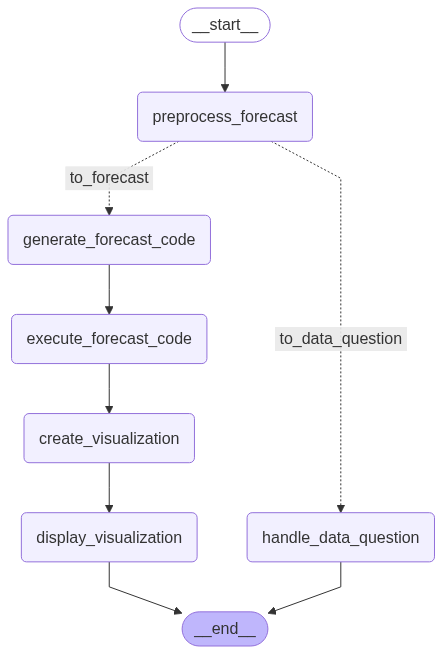

In [ ]:
from IPython.display import Image, display
Image(app.get_graph().draw_mermaid_png())



# Main Use Case function

In [ ]:
def analyze_and_show(question: str, data: pd.DataFrame, sample_size: int = 100) -> None:
    """
    Runs the full workflow and displays:
    - For data questions: Prints analysis results
    - For forecast questions: Prints forecast DataFrame and shows visualization
    """
    # Prepare input data
    if len(data) > sample_size:
        sample = data.sample(sample_size)
    else:
        sample = data.copy()

    # Run the workflow
    result = app.invoke({
        "user_question": question,
        "data_sample_sql": sample.to_dict(),
        "data_sql": data.to_dict()
    })

    # Display appropriate results based on question type
    if result.get('is_data_question'):
        print("\n" + "="*50)
        print(f"DATA ANALYSIS RESULTS: {question}")
        print("="*50)
        print(f"Classification Reason: {result.get('routing_reason', 'Unknown')}")
        print("\nAnalysis Code Generated:")
        print("-"*50)
        print(result.get('data_analysis_code', 'No code generated'))

        print("\nAnalysis Results:")
        print("-"*50)
        analysis_df = pd.DataFrame(result.get('data_analysis_results', {}))
        display(analysis_df)

    else:
        print("\n" + "="*50)
        print(f"FORECAST RESULTS: {question}")
        print("="*50)
        print(f"Classification Reason: {result.get('routing_reason', 'Unknown')}")
        print("\nGenerated Forecast Code:")
        print("-"*50)
        print(result.get('forecast_code', 'No code generated'))

        print("\nForecast DataFrame:")
        print("-"*50)
        forecast_df = pd.DataFrame(result.get('data_forecast', {}))
        display(forecast_df)

        # Show visualization if available
        if result.get('plotly_figure'):
            print("\nForecast Visualization:")
            print("-"*50)
            display(result['plotly_figure'])



## Some use cases

In [ ]:
# analyze_and_show("What are the summary statistics?", df)
# analyze_and_show("Is this time series stationary?", df)
# analyze_and_show("Show me the 7-day rolling average", df)

# # Forecast Examples
# analyze_and_show("Forecast prices for next 30 days", df)
# analyze_and_show("Predict sales for next quarter", df2)
analyze_and_show("What will the oil price be in the next 6 months?", df)

# # Edge Cases
# analyze_and_show("Analyze missing values and forecast next week", df)  # Will default to forecast

KeyboardInterrupt: 

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


# Streamlit Web App

In [ ]:
%%writefile app.py


from langchain_llm7 import ChatLLM7
from langchain_core.messages import HumanMessage, AIMessage
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser,BaseOutputParser
from langgraph.graph import StateGraph,END
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

llm = ChatLLM7(
    model='gpt-4o-mini'
)

## 1- Forecast Preprocessor

forecast_preprocessor_prompt = PromptTemplate(
    template="""
You are an expert question classifier for time series analysis. Your task is to:

1. Analyze the user's question
2. Determine if it requires:
   - Data analysis/exploration (statistics, diagnostics, preparation)
   - Time series forecasting (future predictions)
3. Return JSON with your classification

# CLASSIFICATION CRITERIA:
- DATA ANALYSIS QUESTIONS:
  - Requests for statistics, summaries, or data properties
  - Questions about data quality (missing values, outliers)
  - Time series diagnostics (stationarity, autocorrelation)
  - Data transformations (rolling stats, differencing)

- FORECASTING QUESTIONS:
  - Requests for future predictions
  - Questions about future trends
  - Any question containing time horizons (next 30 days, etc.)

# EXAMPLES:
1. "Show me monthly averages" → DATA_ANALYSIS
2. "Forecast prices for next year" → FORECAST
3. "Is this series stationary?" → DATA_ANALYSIS
4. "Predict sales for Q4" → FORECAST

# OUTPUT FORMAT:
{{
    "question_type": "DATA_ANALYSIS" or "FORECAST",
    "reasoning": "brief explanation of your classification"
}}

USER QUESTION: {question}
""",
    input_variables=["question"]
)


forecast_preprocessor=forecast_preprocessor_prompt | llm | JsonOutputParser()

## 2- Forecast Code Generator

forecast_code_prompt = PromptTemplate(
    template="""
You are a forecasting expert. Given an input question and data provided as a dictionary from a SQL agent, your job is to write Python code to perform a forecast using the data as an input and determining a forecast horizon and which items to forecast.

Return Python code in this format:

```python
def forecast_ts(data):
    ...
    return forecast_df


# **IMPORTANT NOTES**:

 - Return a single function named forecast_ts that ingests a parameter containing "data", and outputs one data frame (forecast_df).

 - Do NOT re-write data inside the generated Python code.

 - Make sure to convert columns containing date information to Pandas datetime.

 - If no ID column is provided, make an ID column for use with the forecasts. Just use "i" for the ID.

# **KEY DECISIONS FROM THE PROVIDED QUESTION**:
 - Which item should be forecasted? If none is provided, assume that all items should be forecasted (use a loop to do this).

 - How far into the future should the forecast be made?

 - If no forecast horizon is provided, determine a reasonable forecast horizon based on the data provided and its periodicity (example: if monthly data, forecast 12 months—a year's worth).

 - If more than one ID column is included in the data, consolidate into a single "id_column"

# **ENHANCED DATA PROCESSING FUNCTIONS**

def forecast_ts(data):
    # ================================
    # Wrap imports inside function
    # ================================
    import numpy as np
    import pandas as pd
    from xgboost import XGBRegressor
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    from sklearn.model_selection import TimeSeriesSplit
    from prophet import Prophet
    from statsmodels.tsa.seasonal import seasonal_decompose
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    from tbats import TBATS
    from sklearn.preprocessing import MinMaxScaler
    import warnings
    warnings.filterwarnings('ignore')

    # ================================
    # Enhanced Data Validation
    # ================================
    def validate_input_data(df):
        ""Comprehensive data validation with detailed error messages""
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        if len(df) < 12:
            raise ValueError("Insufficient data points (minimum 12 required)")

        if df.empty:
            raise ValueError("Empty DataFrame provided")

        if df.isna().all().any():
            raise ValueError("Column with all NaN values detected")

        if df.duplicated().any():
            print("Warning: Duplicate rows detected in input data")

        return True

    # ================================
    # Robust Column Detection
    # ================================
    def detect_columns(df):
        ""Advanced column detection with multiple fallback strategies""
        date_col = None
        value_col = None
        id_col = 'i'  # Default ID column

        # Common naming patterns for date and value columns
        date_patterns = ['date', 'time', 'timestamp', 'datetime', 'ds', 'dt']
        value_patterns = ['value', 'sales', 'price', 'quantity', 'amount', 'target']
        id_patterns = ['id', 'item', 'product', 'store', 'sku']

        # Try exact matches first
        for col in df.columns:
            col_lower = col.lower()
            if date_col is None and any(p in col_lower for p in date_patterns):
                date_col = col
            if value_col is None and any(p in col_lower for p in value_patterns):
                value_col = col
            if any(p in col_lower for p in id_patterns):
                id_col = col

        # Try type inference if not found by name
        if date_col is None:
            for col in df.columns:
                try:
                    if pd.api.types.is_datetime64_any_dtype(df[col]):
                        date_col = col
                        break
                    pd.to_datetime(df[col])  # Test conversion
                    date_col = col
                    break
                except:
                    continue

        if value_col is None:
            numeric_cols = df.select_dtypes(include='number').columns
            if len(numeric_cols) > 0:
                value_col = numeric_cols[0]

        # Final validation
        if date_col is None:
            raise ValueError(
                "Could not identify date column. Available columns: "
                f"{{list(df.columns)}}"
            )
        if value_col is None:
            raise ValueError(
                "Could not identify value column. Available numeric columns: "
                f"{{list(df.select_dtypes(include='number').columns)}}"
            )

        return date_col, value_col, id_col

    # ================================
    # Data Cleaning and Preparation
    # ================================
    def prepare_data(df, date_col, value_col):
        ""Comprehensive data cleaning and preparation""
        # Convert date column
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

        # Handle missing dates
        if df[date_col].isna().any():
            print("Warning: Some dates could not be parsed. Dropping invalid rows.")
            df = df.dropna(subset=[date_col])

        # Sort by date
        df = df.sort_values(date_col)

        # Handle missing values in value column
        if df[value_col].isna().any():
            print("Warning: Missing values found in target column. Using forward fill.")
            df[value_col] = df[value_col].ffill()


        return df

    # ================================
    # Advanced Frequency Detection
    # ================================
    def detect_frequency(df, date_col):
        ""Robust frequency detection with multiple fallback methods""
        try:
            # Try pandas inference first
            freq = pd.infer_freq(df[date_col])
            if freq:
                return freq

            # Calculate time differences
            diffs = df[date_col].diff().dropna()
            if len(diffs) > 0:
                delta = diffs.mode()[0]

                # Common frequency patterns
                if pd.Timedelta(hours=23) <= delta <= pd.Timedelta(hours=25):
                    return 'D'
                elif pd.Timedelta(days=6) <= delta <= pd.Timedelta(days=8):
                    return 'W'
                elif pd.Timedelta(days=28) <= delta <= pd.Timedelta(days=31):
                    return 'M'
                elif pd.Timedelta(days=89) <= delta <= pd.Timedelta(days=92):
                    return 'Q'
                elif pd.Timedelta(days=364) <= delta <= pd.Timedelta(days=366):
                    return 'Y'

        except Exception as e:
            print(f"Frequency detection warning: {{str(e)}}")

        return 'D'  # Default fallback

    # ================================
    # Enhanced Model Evaluation
    # ================================
    def evaluate_model(model_func, train, test, value_col):
        ""Comprehensive model evaluation with multiple metrics""
        try:
            forecast = model_func(train, value_col)

            # Calculate multiple error metrics
            mae = mean_absolute_error(test[value_col], forecast)
            mse = mean_squared_error(test[value_col], forecast)
            rmse = np.sqrt(mse)

            # Calculate MASE
            naive_errors = np.abs(np.diff(train[value_col]))
            mase = mae / np.mean(naive_errors) if len(naive_errors) > 0 else float('inf')

            return {{
                'mae': mae,
                'mse': mse,
                'rmse': rmse,
                'mase': mase
            }}

        except Exception as e:
            print(f"Model evaluation failed: {{str(e)}}")
            return {{
                'mae': float('inf'),
                'mse': float('inf'),
                'rmse': float('inf'),
                'mase': float('inf')
            }}

    # ================================
    # Multi-Seasonal Decomposition
    # ================================
    def detect_seasonality(df, value_col, freq):
        ""Advanced seasonality detection with multiple patterns""
        periods = []
        min_samples = 2  # Minimum cycles needed to detect seasonality

        if freq == 'D':
            if len(df) >= 14:  # 2 weeks
                periods.append(7)  # Weekly
            if len(df) >= 60:  # ~2 months
                periods.append(30)  # Monthly
        elif freq == 'W':
            if len(df) >= 104:  # 2 years
                periods.append(52)  # Yearly
        elif freq == 'M':
            periods.append(12)  # Yearly
            if len(df) >= 24:  # 2 years
                periods.append(3)  # Quarterly

        return periods

    # ================================
    # Enhanced Forecasting Models
    # ================================
    def forecast_with_prophet(df, value_col, date_col, periods, seasonality):
        ""Robust Prophet implementation with error handling""
        try:
            df = df.copy()
            df = df.rename(columns={{date_col: 'ds', value_col: 'y'}})

            m = Prophet(
                yearly_seasonality='auto',
                weekly_seasonality='auto',
                daily_seasonality='auto',
                interval_width=0.95
            )

            # Add detected seasonalities
            for period in seasonality:
                if period == 7:
                    m.add_seasonality(name='weekly', period=7, fourier_order=3)
                elif period == 12:
                    m.add_seasonality(name='yearly', period=365.25, fourier_order=5)
                elif period == 3:
                    m.add_seasonality(name='quarterly', period=91.25, fourier_order=3)

            m.fit(df)
            future = m.make_future_dataframe(
                periods=periods,
                freq=detect_frequency(df, 'ds'),
                include_history=False
            )
            forecast = m.predict(future)

            return forecast.rename(columns={{
                'ds': date_col,
                'yhat': 'forecast',
                'yhat_lower': 'forecast_lower',
                'yhat_upper': 'forecast_upper'
            }})[[date_col, 'forecast', 'forecast_lower', 'forecast_upper']]

        except Exception as e:
            print(f"Prophet failed: {{str(e)}}")
            return None

    def forecast_with_sarimax(df, value_col, seasonal_order):
        ""Robust SARIMAX implementation with error handling""
        try:
            model = SARIMAX(
                df[value_col],
                order=(1,1,1),
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results = model.fit(disp=False)
            forecast = results.get_forecast(steps=seasonal_order[3])
            return pd.DataFrame({{
                'forecast': forecast.predicted_mean,
                'forecast_lower': forecast.conf_int().iloc[:,0],
                'forecast_upper': forecast.conf_int().iloc[:,1]
            }})
        except Exception as e:
            print(f"SARIMAX failed: {{str(e)}}")
            return None

    # ================================
    # Main Forecasting Logic
    # ================================
    def generate_forecast(df, date_col, value_col, id_col, forecast_horizon):
        ""Complete forecasting pipeline with fallbacks""
        try:
            validate_input_data(df)
            df = prepare_data(df, date_col, value_col)
            freq = detect_frequency(df, date_col)
            seasonality = detect_seasonality(df, value_col, freq)

            # Available models with weights
            models = [
                ('Prophet', lambda: forecast_with_prophet(
                    df, value_col, date_col, forecast_horizon, seasonality), 0.5),
                ('SARIMAX', lambda: forecast_with_sarimax(
                    df, value_col, (1,1,1,seasonality[0] if seasonality else 12)), 0.3),
                ('ExponentialSmoothing', lambda: ExponentialSmoothing(
                    df[value_col], seasonal=seasonality[0] if seasonality else None
                ).fit().forecast(forecast_horizon), 0.2)
            ]

            # Evaluate models
            best_model = None
            best_score = float('inf')
            tscv = TimeSeriesSplit(n_splits=3)

            for name, model_fn, weight in models:
                try:
                    scores = []
                    for train_idx, test_idx in tscv.split(df):
                        train, test = df.iloc[train_idx], df.iloc[test_idx]
                        result = evaluate_model(model_fn, train, test, value_col)
                        scores.append(result['mase'])

                    avg_score = np.mean(scores) * (1/weight)  # Weighted score
                    if avg_score < best_score:
                        best_score = avg_score
                        best_model = model_fn
                except Exception as e:
                    print(f"Model {{name}} failed during evaluation: {{str(e)}}")

            # Generate final forecast
            if best_model:
                forecast = best_model()
                if forecast is not None:
                    forecast['id'] = id_col
                    return forecast

            # Fallback to simple moving average if all models fail
            print("All models failed, using simple moving average fallback")
            return pd.DataFrame({{
                date_col: pd.date_range(
                    start=df[date_col].max(),
                    periods=forecast_horizon+1,
                    freq=detect_frequency(df, date_col)
                )[1:],
                'forecast': df[value_col].rolling(3).mean().iloc[-forecast_horizon:].values,
                'id': id_col
            }})

        except Exception as e:
            print(f"Forecasting pipeline failed: {{str(e)}}")
            return pd.DataFrame()

    # ================================
    # Final Implementation
    # ================================
    try:
        df = pd.DataFrame(data)
        date_col, value_col, id_col = detect_columns(df)

        # Determine forecast horizon based on data frequency
        freq = detect_frequency(df, date_col)
        forecast_horizon = {{
            'D': 14,   # 2 weeks
            'W': 8,    # 2 months
            'M': 12,   # 1 year
            'Q': 4,    # 1 year
            'Y': 2     # 2 years
        }}.get(freq, 12)  # Default to 12 periods

        # Generate forecast
        forecast_df = generate_forecast(df, date_col, value_col, id_col, forecast_horizon)

        # Ensure output format consistency
        required_cols = [date_col, 'forecast', 'forecast_lower', 'forecast_upper', 'id']
        for col in required_cols:
            if col not in forecast_df.columns:
                forecast_df[col] = None  # Add missing columns with nulls

        return forecast_df[required_cols]

    except Exception as e:
        print(f"Critical error in forecast_ts: {{str(e)}}")
        return pd.DataFrame()  # Return empty DataFrame on complete failure


# **ERROR PREVENTION MEASURES**:
1. Comprehensive input validation
2. Multiple fallback strategies for column detection
3. Robust data cleaning and preparation
4. Multiple model options with weighted evaluation
5. Graceful degradation when models fail
6. Consistent output format enforcement
7. Detailed error logging at each step

# **RETURN**:
  - Return Python code wrapped in ```python```
  - The function must handle all edge cases gracefully
  - Output DataFrame must always contain: date_col, forecast, forecast_lower, forecast_upper, id

# **INPUTS**:
  - Data sample: {data}
  - User's Forecast Question: {question}
""",
    input_variables=["question", "data"]
)

### Making a Custom output structure for python code

import re

class PythonOutputParser(BaseOutputParser[str]):
    """Parse the output of an LLM call to a Python code block."""

    def parse(self, text: str) -> str:
        """Parse the output of an LLM call."""
        # Find the first occurrence of a Python code block
        match = re.search(r"```python\n(.*?)\n```", text, re.DOTALL)

        if match:
            # Extract the content within the code block
            python_code = match.group(1).strip()
            return python_code
        else:
            # If no code block is found, return the original text or an empty string
            return text.strip() # Or return "" depending on desired behavior

forecast_generator=forecast_code_prompt | llm | PythonOutputParser()


# 3- Data Analyst agent

data_questions_prompt = PromptTemplate(
    template="""
You are a Data Analysis Expert specialized in time series forecasting. Your task is to:
1. Analyze the user's question about forecasting data
2. Generate Python code to answer the question using the provided data
3. Return clean, executable Python code that produces the requested analysis

# GUIDELINES:
- Always work with the provided data (don't create synthetic data)
- Include all necessary imports within the function
- Handle missing/incorrect data gracefully
- Return a pandas DataFrame with the results
- Make the code reusable and well-commented

# COMMON QUESTION TYPES TO HANDLE:
1. Data Exploration:
   - Summary statistics
   - Missing value analysis
   - Time period coverage
   - Outlier detection

2. Forecasting Preparation:
   - Resampling time series
   - Handling missing dates
   - Feature engineering
   - Stationarity tests

3. Forecast Analysis:
   - Model comparisons
   - Error metrics
   - Confidence intervals
   - Residual analysis

4. Data Transformations:
   - Normalization/scaling
   - Differencing
   - Log transformations
   - Rolling statistics

# OUTPUT FORMAT:
```python
def analyze_forecast_data(data):
    \"\"\"
    Analyzes forecasting data based on user question.

    Args:
        data: Input data as dictionary (will be converted to DataFrame)

    Returns:
        pandas.DataFrame with analysis results
    \"\"\"
    import pandas as pd
    import numpy as np
    from statsmodels.tsa.stattools import adfuller
    # Other necessary imports...

    # Convert input to DataFrame
    df = pd.DataFrame(data)

    # [Your analysis code here]

    return results_df

# EXAMPLE QUESTIONS:
"What's the monthly average of the time series?"

"Are there any missing dates in the time series?"

"Show me the rolling 7-day average"

"Is the time series stationary?"

"What's the autocorrelation structure?"

CURRENT QUESTION:
{question}

DATA SAMPLE (first 5 rows):
{data_head}

COLUMNS IN DATA:
{columns}

# IMPORTANT:
Wrap your code in python delimiters

The function must be named analyze_forecast_data

Return a DataFrame even for single-value results
""",
input_variables=["question", "data_head", "columns"]
)

data_questions_agent = data_questions_prompt | llm | PythonOutputParser()

# Visulization Function

## Using LLM to detect columns to plot

column_detection_prompt = PromptTemplate(
    template="""Analyze the following DataFrame columns and identify:
    1. The datetime column (most likely to contain dates/times)
    2. The value column (numeric column to be visualized)

    Return JSON with:
    - "date_column": name of the datetime column
    - "value_column": name of the numeric value column

    Available columns: {columns}
    First row sample: {first_row}

    Focus on these common patterns:
    - Date columns often have names like: date, time, timestamp, datetime
    - Value columns are typically numeric and have names like: value, sales, price, quantity

    If uncertain, choose the most likely candidates.""",
    input_variables=["columns", "first_row"]
)

column_detection_chain = column_detection_prompt | llm | JsonOutputParser()

from typing import Dict
from plotly import graph_objects as go

def detect_columns(df: pd.DataFrame) -> Dict[str, str]:
    """Enhanced column detection with better fallback logic"""
    columns = list(df.columns)

    # Try LLM detection first
    try:
        first_row = df.iloc[0].to_dict()
        result = column_detection_chain.invoke({
            "columns": columns,
            "first_row": first_row
        })
        return {
            "date_column": result["date_column"],
            "value_column": result["value_column"]
        }
    except Exception as e:
        print(f"LLM column detection failed, using fallback: {str(e)}")

    # Enhanced fallback logic
    date_col = None
    value_col = None

    # Check common date column names
    date_candidates = ['date', 'time', 'timestamp', 'datetime', 'ds']
    for col in df.columns:
        if col.lower() in date_candidates:
            date_col = col
            break

    # If no obvious date column found, try to infer
    if date_col is None:
        for col in df.columns:
            try:
                if pd.api.types.is_datetime64_any_dtype(df[col]):
                    date_col = col
                    break
                pd.to_datetime(df[col])  # Test if convertible
                date_col = col
                break
            except:
                continue

    # Find value column - look for numeric columns
    numeric_cols = df.select_dtypes(include='number').columns
    if len(numeric_cols) > 0:
        value_col = numeric_cols[0]  # Use first numeric column

    if date_col is None or value_col is None:
        raise ValueError(
            f"Could not detect required columns. Date candidates: {date_col}, "
            f"Value candidates: {value_col}. Available columns: {columns}"
        )

    return {
        "date_column": date_col,
        "value_column": value_col
    }

def create_visualization(state: Dict) -> Dict:
    """
    Creates an interactive Plotly line plot for the forecast.
    Automatically detects date and value columns using LLM.
    """
    if 'plotly_figure' in state and state['plotly_figure'] is not None:
        return state

    print("Generating Interactive Forecast Visualization")

    # Convert data from state
    forecast_df = pd.DataFrame(state['data_forecast'])

    # Detect columns in forecast data
    forecast_cols = detect_columns(forecast_df)
    date_col = forecast_cols["date_column"]
    value_col = forecast_cols["value_column"]

    if not date_col or not value_col:
        raise ValueError("Could not detect required columns (date and value)")

    # Process date columns
    forecast_df[date_col] = pd.to_datetime(forecast_df[date_col])

    # Create Plotly figure
    fig = go.Figure()

    # Add forecast trace
    fig.add_trace(
        go.Scatter(
            x=forecast_df[date_col],
            y=forecast_df[value_col],
            mode='lines',
            name='Forecast',
            line=dict(color='#ff7f0e', width=2),
            hovertemplate='%{x|%Y-%m-%d}<br>%{y:.2f}<extra></extra>'
        )
    )

    # Add layout configuration
    fig.update_layout(
        title='Time Series Forecast',
        xaxis_title=date_col,
        yaxis_title=value_col,
        hovermode='x unified',
        plot_bgcolor='white',
        margin=dict(l=20, r=20, t=60, b=20),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        xaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1,
            tickformat='%Y-%m-%d'
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1
        )
    )

    # Store both the figure object and its data
    return {
        **state,
        "visualization": {
            "figure_data": {
                "dates": forecast_df[date_col].dt.strftime('%Y-%m-%d').tolist(),
                "values": forecast_df[value_col].tolist(),
                "date_col": date_col,
                "value_col": value_col
            },
            "plotly_figure": fig
        },
        "plotly_figure": fig,
        "date_column": date_col,
        "value_column": value_col
    }

def display_visualization(state: Dict) -> Dict:
    """Displays the Plotly figure and returns unmodified state"""
    if 'visualization_displayed' not in state:
        fig = state.get('plotly_figure')
        if fig:
            display(fig)
            return {**state, "visualization_displayed": True}
    return state

# Using Langraph to connect the workflow

from typing_extensions import TypedDict
from typing import Dict, Optional
import plotly.graph_objects as go
import pandas as pd

class GraphState(TypedDict):
    user_question: str
    data_sample_sql: dict
    data_sql: dict
    forecast_code: str
    data_sample_forecast: dict
    data_forecast: dict
    visualization: Optional[Dict[str, Dict[str, list] | go.Figure]]
    plotly_figure: Optional[go.Figure]
    date_column: Optional[str]
    value_column: Optional[str]
    is_data_question: bool
    routing_reason: Optional[str]
    data_analysis_code: Optional[str]
    data_analysis_results: Optional[dict]

def preprocess_question(state: GraphState) -> GraphState:
    question = state['user_question']

    # Get classification from LLM
    try:
        classification = forecast_preprocessor.invoke({"question": question})
        is_data_question = classification["question_type"] == "DATA_ANALYSIS"

        # If forecast question, get formatted version
        if not is_data_question:
            response = forecast_preprocessor.invoke({"question": question})
            return {
                **state,
                "is_data_question": False,
                "routing_reason": classification["reasoning"]
            }
        else:
            return {
                **state,
                "is_data_question": True,
                "routing_reason": classification["reasoning"]
            }

    except Exception as e:
        # Fallback to original behavior if routing fails
        print(f"Routing failed: {str(e)}")
        response = forecast_preprocessor.invoke({"question": question})
        return {
            **state,
            "is_data_question": False,
            "routing_reason": "Fallback: Defaulted to forecast"
        }


def handle_data_question(state: GraphState) -> GraphState:
    if not state.get('is_data_question'):
        return state

    print("Handling data question...")
    question = state['user_question']
    data_sample = state['data_sample_sql']
    columns = list(pd.DataFrame(data_sample).columns)

    try:
        code = data_questions_agent.invoke({
            "question": question,
            "data_head": data_sample,
            "columns": columns
        })

        local_vars = {}
        global_vars = {}
        exec(code, global_vars, local_vars)
        analysis_fn = local_vars['analyze_forecast_data']
        results_df = analysis_fn(state['data_sql'])

        return {
            **state,
            "data_analysis_code": code,
            "data_analysis_results": results_df.to_dict()
        }

    except Exception as e:
        return {**state, "error": str(e)}


def generate_forecast_code(state):
  print('Forecaster Generating')
  question=state['user_question']
  data=state.get('data_sample_sql')
  response=forecast_generator.invoke({"question": question, "data": data})
  return{
      "forecast_code": response
  }

# Executing Forecast Python Code

def execute_forecast_code(state):
    print('Forecaster Executing')
    # Retrieve the generated Python code and the data from the state
    code = state.get('forecast_code')
    # Get the full data as a dictionary
    data_dict = state.get('data_sql')
    # Get the user's original question
    user_question = state.get('user_question')

    # Prepare dictionaries for executing the code in an isolated environment
    local_vars = {}
    global_vars = {}

    # Execute the generated code. This will define the 'analyze_data' function.
    exec(code, global_vars, local_vars)

    # Call the newly defined 'analyze_data' function with the data and question
    # The function is accessed from the local_vars dictionary
    analysis_result_df = local_vars['forecast_ts'](data_dict)

    # Return the results, including a sample and the full data, converted back to dictionaries
    return {
        "data_sample_forecast": analysis_result_df.head(1000).to_dict(),
        "data_forecast": analysis_result_df.to_dict()
    }

## Defining the workflow structure

workflow = StateGraph(GraphState)

workflow.add_node("preprocess_forecast", preprocess_question)
workflow.add_node("generate_forecast_code", generate_forecast_code)
workflow.add_node("execute_forecast_code", execute_forecast_code)
workflow.add_node("create_visualization", create_visualization)
workflow.add_node("display_visualization", display_visualization)
workflow.add_node("handle_data_question", handle_data_question)

def route_question(state: GraphState) -> str:
    if state.get('is_data_question'):
        return "to_data_question"
    return "to_forecast"

workflow.set_entry_point('preprocess_forecast')
workflow.add_conditional_edges(
    "preprocess_forecast",
    route_question,
    {
        "to_data_question": "handle_data_question",
        "to_forecast": "generate_forecast_code"
    }
)
workflow.add_edge('preprocess_forecast', 'generate_forecast_code')
workflow.add_edge('generate_forecast_code', 'execute_forecast_code')
workflow.add_edge('execute_forecast_code', 'create_visualization')
workflow.add_edge('create_visualization', 'display_visualization')
workflow.add_edge('display_visualization', END)
workflow.add_edge("handle_data_question", END)



app=workflow.compile()

import streamlit as st
import pandas as pd
from io import StringIO
import base64
from IPython.display import display
import matplotlib.pyplot as plt
import tempfile
import os



def clean_conversation():
    """Remove duplicate messages from conversation"""
    if 'conversation' not in st.session_state:
        return

    unique_messages = []
    seen_messages = set()

    for msg in st.session_state.conversation:
        msg_key = str(msg["content"]) if not isinstance(msg["content"], pd.DataFrame) else str(msg["content"].to_dict())
        if msg_key not in seen_messages:
            unique_messages.append(msg)
            seen_messages.add(msg_key)

    st.session_state.conversation = unique_messages

# Set page config
st.set_page_config(
    page_title="AI Forecasting Assistant",
    page_icon="📈",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for better visualization
st.markdown("""
<style>
    .stPlotlyChart {
        border-radius: 10px;
        box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    }
    .stDataFrame {
        border-radius: 10px;
        box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    }
    .css-1v0mbdj {
        border-radius: 10px;
    }
</style>
""", unsafe_allow_html=True)

# App header
st.title("📊 AI Forecasting Assistant")
st.markdown("Upload your time series data and get automated forecasts and analysis")

# Initialize session state
if 'conversation' not in st.session_state:
    st.session_state.conversation = []
if 'df' not in st.session_state:
    st.session_state.df = None
if 'last_question_type' not in st.session_state:
    st.session_state.last_question_type = None


# Sidebar for file upload
with st.sidebar:
    st.header("Data Upload")
    uploaded_file = st.file_uploader(
        "Upload your CSV file",
        type=["csv"],
        help="Upload time series data with at least one date column and one numeric column"
    )

    if uploaded_file is not None:
        try:
            # Read the uploaded file
            st.session_state.df = pd.read_csv(uploaded_file)

            # Basic data info
            st.success("Data uploaded successfully!")
            st.markdown(f"**Shape:** {st.session_state.df.shape}")
            st.markdown("**Columns:**")
            st.write(list(st.session_state.df.columns))

            # Show sample data
            st.markdown("**Sample Data:**")
            st.dataframe(st.session_state.df.head(3))

        except Exception as e:
            st.error(f"Error reading file: {str(e)}")

    st.markdown("---")
    st.markdown("""
    **How to use:**
    1. Upload your time series data (CSV)
    2. Ask questions in the chat
    3. Get forecasts or analysis

    **Example questions:**
    - "Show me summary statistics"
    - "Is this time series stationary?"
    - "Forecast prices for next 30 days"
    """)

clean_conversation()
# Main chat interface
st.header("Chat with AI Analyst")

# Display conversation history
for msg in st.session_state.conversation:
    with st.chat_message(msg["role"]):
        if isinstance(msg["content"], pd.DataFrame):
            st.dataframe(msg["content"])
        elif "plotly_figure" in msg:
            st.plotly_chart(msg["content"], use_container_width=True)
        else:
            st.write(msg["content"])

# Chat input
if prompt := st.chat_input("Ask a question about your data..."):
    if st.session_state.df is None:
        st.error("Please upload a dataset first!")
        st.stop()

    # Add user question to conversation
    st.session_state.conversation.append({"role": "user", "content": prompt})
    with st.chat_message("user"):
        st.write(prompt)

    # Show typing indicator
    with st.chat_message("assistant"):
        with st.spinner("Analyzing your question..."):
            try:
                # Run the workflow
                result = app.invoke({
                    "user_question": prompt,
                    "data_sample_sql": st.session_state.df.head(100).to_dict(),
                    "data_sql": st.session_state.df.to_dict()
                })

                # Handle response based on question type
                if result.get('is_data_question'):
                    # Data analysis results
                    analysis_df = pd.DataFrame(result.get('data_analysis_results', {}))

                    # Add to conversation
                    st.session_state.conversation.append({
                        "role": "assistant",
                        "content": f"Here's the analysis for: {prompt}",
                    })
                    st.session_state.conversation.append({
                        "role": "assistant",
                        "content": analysis_df
                    })

                    # Display in current response
                    st.write(f"Here's the analysis for: {prompt}")
                    st.dataframe(analysis_df)

                else:
                    # Forecast results
                    forecast_df = pd.DataFrame(result.get('data_forecast', {}))

                    # Add to conversation
                    st.session_state.conversation.append({
                        "role": "assistant",
                        "content": f"Forecast results for: {prompt}",
                    })
                    st.session_state.conversation.append({
                        "role": "assistant",
                        "content": forecast_df
                    })

                    # Display forecast
                    st.write(f"Forecast results for: {prompt}")
                    st.dataframe(forecast_df)

                    # Display visualization if available
                    if result.get('plotly_figure'):
                        st.session_state.conversation.append({
                            "role": "assistant",
                            "content": result['plotly_figure'],
                            "plotly_figure": True
                        })
                        st.plotly_chart(result['plotly_figure'], use_container_width=True)

            except Exception as e:
                error_msg = f"Sorry, I encountered an error: {str(e)}"
                st.session_state.conversation.append({
                    "role": "assistant",
                    "content": error_msg
                })
                st.error(error_msg)



# Add download button for results
if len(st.session_state.conversation) > 0 and st.session_state.df is not None:
    st.sidebar.markdown("---")
    st.sidebar.header("Export Results")

    # Get the last assistant message with data
    last_result = None
    for msg in reversed(st.session_state.conversation):
        if msg["role"] == "assistant" and isinstance(msg.get("content"), pd.DataFrame):
            last_result = msg["content"]
            break

    if last_result is not None:
        csv = last_result.to_csv(index=False)
        b64 = base64.b64encode(csv.encode()).decode()
        st.sidebar.download_button(
            label="Download Last Results (CSV)",
            data=csv,
            file_name="analysis_results.csv",
            mime="text/csv"
        )

Overwriting app.py


In [ ]:
!npm install localtunnel
!streamlit run app.py &>/dev/null&

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 22 packages in 3s
⠸
⠸3 packages are looking for funding
⠸  run `npm fund` for details
⠸

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.125.71.60


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.71.60:8501

your url is: https://empty-ducks-build.loca.lt
Forecaster Generating
Forecaster Executing
13:33:47 - cmdstanpy - INFO - Chain [1] start processing
13:33:48 - cmdstanpy - INFO - Chain [1] done processing
Generating Interactive Forecast Visualization
Figure({
    'data': [{'hovertemplate': '%{x|%Y-%m-%d}<br>%{y:.2f}<extra></extra>',
              'line': {'color': '#ff7f0e', 'width': 2},
              'mode': 'lines',
              'name': 'Forecast',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 9, 1, 0, 0),
                          datetime.datetime(2017, 9, 2, 0, 0),
                          datetime.datetime(2017, 9, 3, 0, 0),
                          datetime.datetime(2017, 9, 4, 0, 0),
                          datetime.datetime(2017, 9, 5, 0, 0),
                      